[<img src="FS_wiki.png" width="200" height="240" align="left"/>](https://flatironschool.com/)

# Effective Data Communication Using Python

## Dr. Chester Ismay

### Director of Data Science Education, Flatiron School

### 2021-08-09

Repo available at: https://bit.ly/

---

### About me

![](az.jpg)

![](stat.jpg)

![](r-python.jpeg)

- Co-author of the [fivethirtyeight](https://fivethirtyeight-r.netlify.app/) R package
- Co-author of a textbook on getting started with statistics and data science in R at https://www.moderndive.com.
- Currently, live in beautiful (and later this week...very hot) [Portland, Oregon](https://www.travelportland.com/)

Connect with me
- on [LinkedIn](https://www.linkedin.com/in/chesterismay/),
- on [Twitter](https://twitter.com/old_man_chester), or
- via [my webpage](http://chester.rbind.io/).

## Theme for today

![](plane.jpg)

### Learning objectives

- How to use the pandas package to wrangle your data
- How to create static and interactive visualizations
- Some tips on conveying information with data effectively
- What to look out for with “bad” visualizations

Some bonus tips
- Debugging errors (I've left some errors throughout the notebook for us to fix together)
    - A solution file will be added to the repo after the workshop too
- Extra resources will be shared after covering learning objectives too

### Basics of Jupyter notebook

- [Literate programming](https://en.wikipedia.org/wiki/Literate_programming)
- [Markdown cells](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html)
- [Code cells](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Running%20Code.html)
- [Getting help](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html)
    - [Tips and tricks](https://towardsdatascience.com/optimizing-jupyter-notebook-tips-tricks-and-nbextensions-26d75d502663)
    - Help menu, Keyboard shortcuts
    - [?, ??, tab-complete](https://jakevdp.github.io/PythonDataScienceHandbook/01.01-help-and-documentation.html)

### Load packages

In [ ]:
# Install packages
# !pip install pandas
# !pip install plotly

In [1]:
# Load packages to use their functionality
import pandas as pd
import plotly.express as px

### Load and cleanup data

The data comes from <https://github.com/fivethirtyeight/data/tree/master/flying-etiquette-survey>. As linked there, this is the data behind the story [41 Percent of Fliers Say It’s Rude To Recline Your Airplane Seat](http://fivethirtyeight.com/datalab/airplane-etiquette-recline-seat). It's from all the way back in 2014, but can provide some insight into how people view different things passengers do on airplanes.

In [4]:
# Read in CSV file as a pandas DataFrame
flying_survey_raw = pd.read_csv("flying-etiquette.csv")

In [5]:
# Look over the names of the columns in the data
list(flying_survey_raw.columns)

['RespondentID',
 'How often do you travel by plane?',
 'Do you ever recline your seat when you fly?',
 'How tall are you?',
 'Do you have any children under 18?',
 'In a row of three seats, who should get to use the two arm rests?',
 'In a row of two seats, who should get to use the middle arm rest?',
 'Who should have control over the window shade?',
 'Is itrude to move to an unsold seat on a plane?',
 'Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?',
 "On a 6 hour flight from NYC to LA, how many times is it acceptable to get up if you're not in an aisle seat?",
 'Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?',
 'Is itrude to recline your seat on a plane?',
 'Given the opportunity, would you eliminate the possibility of reclining seats on planes entirely?',
 'Is it rude to ask someone to switch seats with you in order to be closer to f

We can see that these column names, while very informative as to the question asked, might be a little annoying to deal with over and over again as we code. Let's rename them to be a little more manageable.

Note that there are a couple of misspellings here as well with words running together that could cause us issues.

In [6]:
?flying_survey_raw.rename
# Scroll down to examples

In [7]:
# Use the .rename() method from pandas
# The original column name comes before the colon, the new name after
flying_survey_cleaned = flying_survey_raw.rename(
    columns = {"RespondentID": "respondent_id",
               "Gender": "gender",
               "Household Income": "household_income",
               "Age": "age",
               "Income": "income",
               "Education": "education",
               "Location (Census Region)": "location",
               "How often do you travel by plane?": "frequency",
               "Do you ever recline your seat when you fly?": "recline_frequency",
               "How tall are you?": "height",
               "Do you have any children under 18?": "children_under_18",
               "In a row of three seats, who should get to use the two arm rests?": "two_arm_rests",
               "In a row of two seats, who should get to use the middle arm rest?": "middle_arm_rest",
               "Who should have control over the window shade?": "window_shade",
               "Is itrude to move to an unsold seat on a plane?": "unsold_seat",
               "Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?": "talk_stranger",
               "On a 6 hour flight from NYC to LA, how many times is it acceptable to get up if you're not in an aisle seat?": "get_up",
               "Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?": "recline_obligation",
               "Is itrude to recline your seat on a plane?": "recline_rude",
               "Given the opportunity, would you eliminate the possibility of reclining seats on planes entirely?": "recline_eliminate",
               "Is it rude to ask someone to switch seats with you in order to be closer to friends?": "switch_seats_friends",
               "Is itrude to ask someone to switch seats with you in order to be closer to family?": "switch_seats_family",
               "Is it rude to wake a passenger up if you are trying to go to the bathroom?": "wake_up_bathroom",
               "Is itrude to wake a passenger up if you are trying to walk around?": "wake_up_walk",
               "In general, is itrude to bring a baby on a plane?": "baby",
               "In general, is it rude to knowingly bring unruly children on a plane?": "unruly_child",
               "Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction?": "electronics",
               "Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?": "smoked"
              }
)

In [8]:
# How many (rows, columns) are in the data?
flying_survey_cleaned.shape

(1040, 27)

In [23]:
# List the newly named column names
list(flying_survey_cleaned.cols)

AttributeError: 'DataFrame' object has no attribute 'cols'

#### Poll Question 1

If you want to rename a column from `old_name` to `new_name`, which of the following is the correct syntax to the `columns` argument of the `.rename()` method in `pandas`?

A. `"old_name": "new_name"`  
B. `"new_name": "old_name"`  
C. Either order works  
D. None of the above are correct  

In [68]:
# Take a peek at the first 5 rows and last 5 rows
# of the data with new column names
flying_survey_cleaned

,respondent_id,frequency,recline_frequency,height,children_under_18,two_arm_rests,middle_arm_rest,window_shade,unsold_seat,talk_stranger,...,wake_up_walk,baby,unruly_child,electronics,smoked,gender,age,household_income,education,location
0,3436139758,Once a year or less,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3434278696,Once a year or less,About half the time,"6'3""",Yes,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"No, not at all rude","No, not at all rude","No, not at all rude",No,No,Male,30-44,NaN,Graduate degree,Pacific
2,3434275578,Once a year or less,Usually,"5'8""",No,Whoever puts their arm on the arm rest first,The arm rests should be shared,The person in the window seat should have excl...,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$100,000 - $149,999",Bachelor degree,Pacific
3,3434268208,Once a year or less,Always,"5'11""",No,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$0 - $24,999",Bachelor degree,Pacific
4,3434250245,Once a month or less,About half the time,"5'7""",No,The person in the middle seat gets both arm rests,The person in aisle,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",Yes,No,Male,30-44,"$50,000 - $99,999",Bachelor degree,Pacific
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,3431732652,Once a year or less,Once in a while,"5'7""",No,Other (please specify),Other (please specify),Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"No, not at all rude","Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$0 - $24,999",Some college or Associate degree,East North Central
1036,3431731770,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Male,45-60,150000,Bachelor degree,Pacific
1037,3431731485,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Female,> 60,NaN,Some college or Associate degree,East North Central
1038,3431731196,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Female,30-44,"$50,000 - $99,999",Bachelor degree,New England


**Questions**: What does a row correspond to? In other words, the different columns are measuring/characteristics of what??
- Respond in the Zoom chat by changing from Everyone to Panelists (so to not influence others)

The article focuses only on those of the 1040 that have flown (874). Let's use `pandas` to filter out those that haven't flown too.

In [12]:
# The .value_counts() method shows how many rows had each of the
# different options for flying frequency
flying_survey_cleaned["frequency"].value_counts()

Once a year or less      633
Once a month or less     205
Never                    166
A few times per month     29
A few times per week       4
Every day                  3
Name: frequency, dtype: int64

In [14]:
# Focus on those that have flown before
flying_survey = flying_survey_cleaned["frequency" != "Never"]

KeyError: True

In [35]:
# Focus on those that have flown before
flying_survey = flying_survey_cleaned[flying_survey_cleaned["frequency"] != "Never"]

In [36]:
# Output new counts
flying_survey["frequency"].value_counts()

Once a year or less      633
Once a month or less     205
A few times per month     29
A few times per week       4
Every day                  3
Name: frequency, dtype: int64

In [37]:
# Why does this subsetting in the [] work?
flying_survey_cleaned["frequency"] != "Never"

0        True
1        True
2        True
3        True
4        True
        ...  
1035     True
1036    False
1037    False
1038    False
1039     True
Name: frequency, Length: 1040, dtype: bool

In [38]:
# How many (rows, columns) in this filtered data?
flying_survey.shape

(874, 27)

In [69]:
# Get the number of rows in the filtered data directly
len(flying_survey)

874

In [39]:
# Explore some properties of the columns of data
flying_survey.describe()

,respondent_id
count,8.740000e+02
mean,3.432704e+09
std,6.053105e+05
min,3.431730e+09
25%,3.432265e+09
50%,3.432655e+09
75%,3.433134e+09
max,3.436140e+09


In [40]:
# Examine the help for the .describe() method for a DataFrame
help(flying_survey.describe)

Help on method describe in module pandas.core.generic:

describe(percentiles=None, include=None, exclude=None) -> ~FrameOrSeries method of pandas.core.frame.DataFrame instance
    Generate descriptive statistics.
    
    Descriptive statistics include those that summarize the central
    tendency, dispersion and shape of a
    dataset's distribution, excluding ``NaN`` values.
    
    Analyzes both numeric and object series, as well
    as ``DataFrame`` column sets of mixed data types. The output
    will vary depending on what is provided. Refer to the notes
    below for more detail.
    
    Parameters
    ----------
    percentiles : list-like of numbers, optional
        The percentiles to include in the output. All should
        fall between 0 and 1. The default is
        ``[.25, .5, .75]``, which returns the 25th, 50th, and
        75th percentiles.
    include : 'all', list-like of dtypes or None (default), optional
        A white list of data types to include in the result

In [41]:
# include = "all" shows results for all columns 
# (not just the default of numeric columns)
flying_survey.describe(include = "all")

,respondent_id,frequency,recline_frequency,height,children_under_18,two_arm_rests,middle_arm_rest,window_shade,unsold_seat,talk_stranger,...,wake_up_walk,baby,unruly_child,electronics,smoked,gender,age,household_income,education,location
count,8.740000e+02,874,858,858,851,856,856,856,855,855,...,850,849,849,849,849,843,843,698,837,837
unique,NaN,5,5,20,2,5,5,2,3,3,...,3,3,3,2,2,2,4,5,5,9
top,NaN,Once a year or less,Once in a while,"5'4""",No,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","No, not at all rude","Yes, very rude",No,No,Female,45-60,"$50,000 - $99,999",Bachelor degree,Pacific
freq,NaN,633,257,79,662,587,583,495,690,675,...,446,592,351,713,842,442,234,258,279,185
mean,3.432704e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,6.053105e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.431730e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.432265e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.432655e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.433134e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's start to look through some of the other columns and their values:

In [42]:
# How often do you recline?
# Absolute counts
flying_survey["recline_frequency"].value_counts()

Once in a while        257
Usually                175
Never                  171
Always                 137
About half the time    118
Name: recline_frequency, dtype: int64

In [43]:
# Relative frequencies
flying_survey["recline_frequency"].value_counts() / len(flying_survey) * 100

Once in a while        29.405034
Usually                20.022883
Never                  19.565217
Always                 15.675057
About half the time    13.501144
Name: recline_frequency, dtype: float64

In [44]:
# Is it rude to wake up those in your aisle to use the bathroom?
flying_survey["wake_up_bathroom"].value_counts() / len(flying_survey) * 100

No, not at all rude    61.212815
Yes, somewhat rude     32.151030
Yes, very rude          3.890160
Name: wake_up_bathroom, dtype: float64

In [45]:
# Is it rude to bring an unruly child on the plane?
flying_survey["unruly_child"].value_counts() / len(flying_survey) * 100

Yes, very rude         40.160183
Yes, somewhat rude     40.160183
No, not at all rude    16.819222
Name: unruly_child, dtype: float64

In [46]:
# Is it rude to bring a baby on the plane?
flying_survey["baby"].value_counts() / len(flying_survey) * 100

No, not at all rude    67.734554
Yes, somewhat rude     20.823799
Yes, very rude          8.581236
Name: baby, dtype: float64

#### Poll Question 2

Why are relative frequencies sometimes a better metric than actual counts?

A. Relative frequencies show the total number of occurrences in each group, whereas actual counts are divided by the total number of rows.  
B. The actual counts are always going to be percentage values.   
C. Relative frequencies allow for comparisons across groups/columns to be easier.    
D. None of the above are correct  

### Summarize data and explore it further

Walk through some of the analysis done in Python from the article:

In [47]:
# Show how many people fall into the different categories
# of having a young child versus feelings on bringing
# an unruly child on a plane
parent_by_unruly = pd.crosstab(
    index=flying_survey["children_under_18"],
    columns=flying_survey["unruly_child"],
    margins=True
)
parent_by_unruly

unruly_child,"No, not at all rude","Yes, somewhat rude","Yes, very rude",All
children_under_18,,,,
No,96,251,310,657
Yes,50,97,41,188
All,146,348,351,845


In [48]:
# Show the percentage breakdowns across each row
pd.crosstab(
    index=flying_survey["children_under_18"],
    columns=flying_survey["unruly_child"],
    normalize='index'
) * 100

unruly_child,"No, not at all rude","Yes, somewhat rude","Yes, very rude"
children_under_18,,,
No,14.611872,38.203957,47.184170
Yes,26.595745,51.595745,21.808511


### Learning objectives (recap)

- _How to use the pandas package to wrangle your data_
    - Additional references:
        - [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/index.html)
        - [Pandas for Everyone book](https://www.powells.com/book/pandas-for-everyone-python-data-analysis-9780134546933)
        - [Pandas Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
- How to create static and interactive visualizations
- Some tips on conveying information with data effectively
- What to look out for with “bad” visualizations

---

### Visualize relationships in the data

Going further as the article suggests:

Question of interest
- How do different age groups feel about the person in front of them reclining?

In [49]:
age_by_recline_perc = pd.crosstab(
    index=flying_survey["age"],
    columns=flying_survey["recline_rude"],
    normalize='index'
) * 100
age_by_recline_perc

recline_rude,"No, not rude at all","Yes, somewhat rude","Yes, very rude"
age,,,
18-29,45.348837,43.023256,11.627907
30-44,64.414414,28.828829,6.756757
45-60,59.829060,34.188034,5.982906
> 60,61.860465,28.372093,9.767442


<AxesSubplot:>

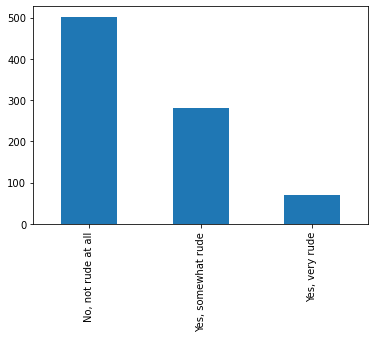

In [50]:
# Visualize 'Is reclining rude?' across all age groups
flying_survey["recline_rude"].value_counts().plot(kind="bar")

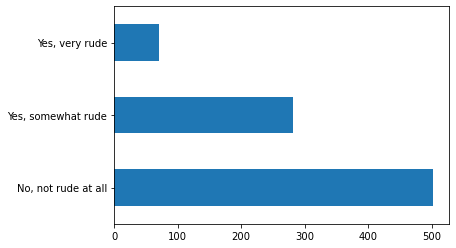

In [51]:
# Visualize 'Is reclining rude?' across all age groups
flying_survey["recline_rude"].value_counts().plot(kind="barh");

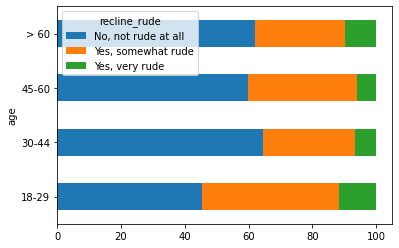

In [52]:
# Visualize "Is reclining rude?" within each age group
age_by_recline_perc.plot(kind="barh", stacked=True);

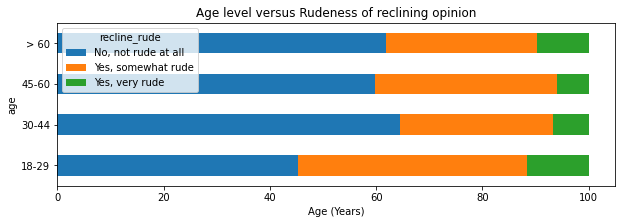

In [60]:
# Add some style to the plot
age_by_recline_plot = age_by_recline_perc.plot(
    kind="barh", 
    stacked=True,
    title="Age level versus Rudeness of reclining opinion",
    figsize=(10, 3)
)
age_by_recline_plot.set_xlabel("Percentage")
age_by_recline_plot.set_xlabel("Age (Years)");

### Interactive data visualization to drill down

In [63]:
# Load plotly
import plotly.graph_objects as go

# Initiate data list for figure
plotly_data = []

# Use a for loop on every column to create bar data
for x in age_by_recline_perc.columns:
   plotly_data.append(
       go.Bar(name=str(x), 
              x=age_by_recline_perc.index, 
              y=age_by_recline_perc[x]))

# Create visualization and stack the bars on top of each other
figure = go.Figure(plotly_data)
figure.update_layout(barmode = 'stack')

In [64]:
# Might be nicer to see the bars next to each other instead
figure.update_layout(barmode="group")

Now let's try to answer:

Question of interest
- How do different age groups feel about the person in front of them reclining?

### Learning objectives (second recap)

- _How to use the pandas package to wrangle your data_
    - Additional references:
        - [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/index.html)
        - [Pandas for Everyone book](https://www.powells.com/book/pandas-for-everyone-python-data-analysis-9780134546933)
        - [Pandas Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
- _How to create static and interactive visualizations_
    - Additional references:
        - [Pandas chart visualization documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)
        - [Plotly barchart documention](https://plotly.com/python/bar-charts/)
- Some tips on conveying information with data effectively
- What to look out for with “bad” visualizations

---

### Tips on communicating with data

1. Almost always add some discussion of the key findings of your plot immediately following your plot.
    - Don't assume your audience knows the data as well as you do (They rarely if ever do)
1. Highlight the key points you want the reader to understand often with supporting evidence.
1. Label your axes and include a sensible legend.
1. Use your plots to tell the story you want to tell, but...

<u>**DO NOT just pull out whatever you can to match your narrative, ignoring everything else!**</u>

### Avoiding...ugh...bad visualizations

Highly recommend the [r/dataisugly](https://www.reddit.com/r/dataisugly/) subreddit. Let's review a couple really bad graphics and identify what is bad about them.

[![](bad-us-golds.png)](https://www.reddit.com/r/dataisugly/comments/oxvu09/25_usa_gold_medals_32_chinese_gold_medals/?utm_source=share&utm_medium=ios_app&utm_name=iossmf)

[![](heat-wave-bad.png)](https://www.reddit.com/r/dataisugly/comments/p0gzaz/what_temperature_is_gray_again_theres_like_three/?utm_source=share&utm_medium=ios_app&utm_name=iossmf)

[![](gymnasts-bad.jpg)](https://www.reddit.com/r/dataisugly/comments/owtpew/they_did_a_linear_regression_on_champion_gymnast/?utm_source=share&utm_medium=ios_app&utm_name=iossmf)

The more popular [r/dataisbeautiful](https://www.reddit.com/r/dataisbeautiful/) subreddit does have some nice plots, but can sometimes be a little too complex for my personal taste. For example...

[![](2020-golds.png)](https://www.reddit.com/r/dataisbeautiful/comments/p0awgr/oc_a_photofinish_race_for_the_most_gold_medals_at/)

### Learning objectives review

- _How to use the pandas package to wrangle your data_
    - Additional references:
        - [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/index.html)
        - [Pandas for Everyone book](https://www.powells.com/book/pandas-for-everyone-python-data-analysis-9780134546933)
        - [Pandas Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
- _How to create static and interactive visualizations_
    - Additional references:
        - [Pandas chart visualization documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)
        - [Plotly barchart documention](https://plotly.com/python/bar-charts/)
- _Some tips on conveying information with data effectively_
    - Additional references:
        - [Creating More Effective Graphs book](https://www.nbr-graphs.com/resources/recommended-books/)
        - [The Power in Effective Data Storytelling video](https://www.youtube.com/watch?v=0e52QfQngrM)
        - [200 years in 4 minutes video](https://www.youtube.com/watch?v=Z8t4k0Q8e8Y)
- _What to look out for with “bad” visualizations_
    - Additional references:
        - [How to spot a misleading graph video](https://www.youtube.com/watch?v=E91bGT9BjYk)
        - [The 27 Worst Charts of All Time (article from 2013)](https://www.businessinsider.com/the-27-worst-charts-of-all-time-2013-6)

### Next steps

- Do opinions change based on location?
- Do opinions vary based on household income?
- Could you create a function to get the relative frequencies so you wouldn't have to copy that same code over and over?
- What other visualizations might be helpful here?

## Thanks for attending!

[![](thanks.gif)](https://media.giphy.com/media/229ORmLCNmURn1tqnJ/giphy.gif)

Connect with me
- on [LinkedIn](https://www.linkedin.com/in/chesterismay/),
- on [Twitter](https://twitter.com/old_man_chester), or
- via [my webpage](http://chester.rbind.io/).

Check for solutions coming soon at https://github.com/